# Projeto 2 - Modelo Preditivo Titanic em Python

O objetivo desse estudo é prever se um determinado passageiro poderia ou não 
sobreviver com base em informações como idade, sexo, classe na embarcação e etc. É o mais famoso desafio proposto pelo Kaggle, uma plataforma de Data Science. 

## Dicionário de Dados

 desafio foi proposto pelo Kaggle, o dicionário dos dados é:

  - Survival: 0 = Não sobreviveu, 1 = Sobreviveu
    
    
  - pclass (Ticket class): 1 = Primeira Classe, 2 = Segunda Classe, 3 = Terceira Classe
    
    
  - sex: Sexo do passageiro
  
  
  - Age: Idade do passageiro	
    
    
  - sibsp: Número de irmãos/Cônjugues a bordo do Titanic
  
  
  - parch: Pai ou mãe/Filhos a bordo do Titanic	
  
  
  - ticket: Número da passagem	
    
    
  - Passenger fare: Tarifa do passageiro
   
   
  - cabin number: Número da cabine no Titanic	
    
    
  - embarked: Porto de embarque C = Cherbourg, Q = Queenstown, S = Southampton
    

A fonte do dataset é: https://www.kaggle.com/c/titanic/overview

## O que foi o desastre do Titanic?

O destino do Titanic foi selado em sua viagem inaugural de Southampton, na Inglaterra, à cidade de Nova York. Às 23h40 de 14 de abril de 1912, a lateral do Titanic colidiu com um iceberg no norte do Atlântico, afundando partes do casco do estibordo por uma extensão de quase 100 metros e expondo à água do mar os seis compartimentos dianteiros à prova d’água. A partir daquele instante, o naufrágio era inevitável. 

Fonte: https://www.nationalgeographicbrasil.com/historia/2019/08/como-foi-o-naufragio-e-redescoberta-do-titanic

## Etapa 1 - Carga dos pacotes e dataset

A coleta dos dados foi com base nos arquivos disponibilizados pelo Kaggle.
Foram 3 datasets, um para treino do modelo e outro para teste. Por último, 
temos o dataset para submissão das respostas no site.

In [1]:
# carregando os pacotes e removendo os avisos
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Carregando o dataset de treino e teste
df_treino = pd.read_csv('python_scripts/titanic/train.csv')
df_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_teste = pd.read_csv('python_scripts/titanic/test.csv')
df_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Etapa 2 - Análise Exploratória dos dados e Pré-Processamento

Nesta etapa é possível fazer análises rápidas sobre o conjunto de dados
bruto. Assim já fica claro que algumas variáveis precisam ser transformadas.

In [4]:
# Verifica o tipo de variável

tipo = df_treino.dtypes
print(tipo)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
# Convertendo a categoria Sex em binária em treino

df_treino = df_treino.replace(to_replace = ['male', 'female'], value = [1,0])

df_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Convertendo a categoria Sex em binária em teste

df_teste = df_teste.replace(to_replace = ['male', 'female'], value = [1,0])

df_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Conversão de variáveis numéricas/strings em categóricas no dataset de treino

df_treino['Pclass'] = df_treino['Pclass'].astype('object')
df_treino['PassengerId'] = df_treino['PassengerId'].astype('object')

tipo = df_treino.dtypes
print(tipo)

PassengerId     object
Survived         int64
Pclass          object
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
# Conversão de variáveis numéricas/strings em categóricas no dataset de teste

df_teste['Pclass'] = df_teste['Pclass'].astype('object')
df_teste['PassengerId'] = df_teste['PassengerId'].astype('object')

tipo = df_teste.dtypes
print(tipo)

PassengerId     object
Pclass          object
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
# Verificar se o dataset tem valores nulos. 

# Survived possui muitos NAs, mas o dataset de test não tem essa variável. Como ele já veio do Kaggle, então não é algo para
# se considerar nesta etapa do pré-processamento. 

# Do contrário é a variável Age, nesta etapa será necessário preencher os registros NAs. 
# Em relação a Cabin, pode ser uma variável que não precise de nenhuma transformação porque temos muitos NAs. 
# É mais fácil remover do dataset.

print('Treino \n')
print(df_treino.isnull().sum())
print('------------------')
print('Teste \n')
print(df_teste.isnull().sum())

Treino 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------
Teste 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
# Cálculo da média considerando o sexo do passageiro
mean_men_train = df_treino[df_treino['Sex']==1]['Age'].mean()
mean_women_train = df_treino[df_treino['Sex']==0]['Age'].mean()

mean_men_test = df_teste[df_teste['Sex']==1]['Age'].mean()
mean_women_test = df_teste[df_teste['Sex']==0]['Age'].mean()

In [11]:
# Input dos valores missing na variável Age com a mediana para evitar os outliers, considerando o sexo do passageiro
df_treino.loc[(df_treino.Age.isnull()) & (df_treino['Sex']==0),'Age'] = mean_women_train
df_treino.loc[(df_treino.Age.isnull()) & (df_treino['Sex']==1),'Age'] = mean_men_train

df_teste.loc[(df_teste.Age.isnull()) & (df_teste['Sex']==0),'Age'] = mean_women_test
df_teste.loc[(df_teste.Age.isnull()) & (df_teste['Sex']==1),'Age'] = mean_men_test

In [12]:
# Virifica se ainda há valores nulos

print('Treino \n')
print(df_treino.isnull().sum())
print('------------------')
print('Teste \n')
print(df_teste.isnull().sum())

Treino 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------
Teste 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Text(0.5, 1.0, 'Histograma - Idade')

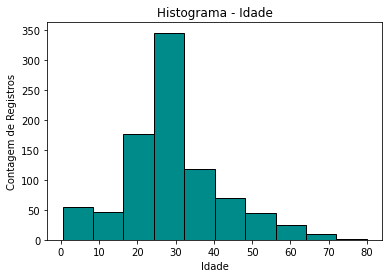

In [13]:
# Ao analisar o histograma das idades, vemos que a distribuição parece não seguir uma normal.
# Contudo, é necessário os testes de normalidade
# O Histograma mostra uma população na casa dos 30 anos.

plt.hist(df_treino['Age'], color = 'darkcyan', edgecolor = 'black')
plt.ylabel('Contagem de Registros')
plt.xlabel('Idade')
plt.title('Histograma - Idade')

In [14]:
# teste de normalidade
# O teste rejeitou a normalidade dos dados. Nesse caso, o que pode ter ocasionado isso é o baixo volume de dados (1.309 registros).
# De acordo com o teorama do limite central, quanto maior o volume de dados mais próximo os dados ficam de uma distribuição normal
# Sendo assim, podemos continuar com as análises. Contudo, isso deve ser levado em consideração na conclusão. 

normal_test = stats.normaltest(df_treino['Age'])
print("O valor p é:", normal_test.pvalue)

O valor p é: 6.710688462511316e-10


Text(0.5, 1.0, 'Distribuição de Sexo por Classe')

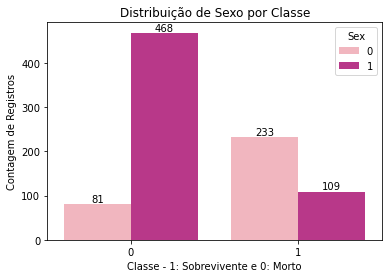

In [15]:
# O gráfico de barras mostra que o maior número de sobreviventes foram mulheres. 
# No Titanic, a prioridade de evacuação foram mulheres e crianças primeiro
# Um sinal de que é uma variável importante

graf_class = sns.countplot(x = 'Survived', data = df_treino, palette = 'RdPu', hue = 'Sex')
graf_class.bar_label(graf_class.containers[0])
graf_class.bar_label(graf_class.containers[1])
graf_class.set_xlabel('Classe - 1: Sobrevivente e 0: Morto')
graf_class.set_ylabel('Contagem de Registros')
graf_class.set_title('Distribuição de Sexo por Classe')

Text(0.5, 1.0, 'Distribuição de Tipo de Acomodação por Classe')

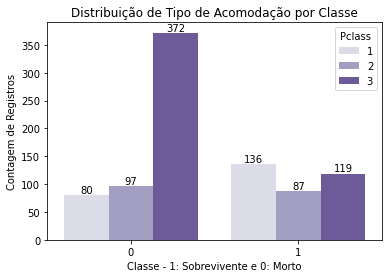

In [16]:
# Pelo gráfico de barras, o maior número de sobreviventes eram da 1ª classe, 
# O que faz sentido pelo fato deles terem tido prioridade na evacuação.
# Ao contrário da 3ª classe que teve o maior número de vitimas na tragédia. Podemos inferir que essa á uma variável importante

graf_class = sns.countplot(x = 'Survived', data = df_treino, palette = 'Purples', hue = 'Pclass')
graf_class.bar_label(graf_class.containers[0])
graf_class.bar_label(graf_class.containers[1])
graf_class.bar_label(graf_class.containers[2])
graf_class.set_xlabel('Classe - 1: Sobrevivente e 0: Morto')
graf_class.set_ylabel('Contagem de Registros')
graf_class.set_title('Distribuição de Tipo de Acomodação por Classe')

In [17]:
# Seleção de variáveis
df_treino = df_treino.loc[:,['Survived', 'Pclass', 'Sex', 'Age', 'SibSp']]
df_teste = df_teste.loc[:,['Pclass', 'Sex', 'Age', 'SibSp']]

O total de registros é: 891
Para a classe 1 temos: 38.4 %
Para a classe 2 temos: 61.6 %


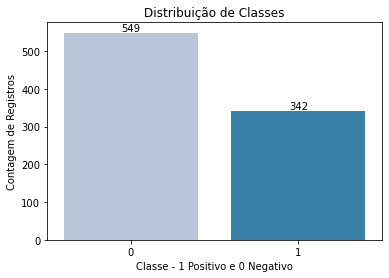

In [18]:
# Visualizando o balanceamento de classes

# Como o gráfico demonstra, temos um desbalanceamento de classes no dataset que é algo esperado. 
# O ideal é que as classes tenham uma distribuição próximo de 50%, sendo que até 45% em um classe seja aceitável. 
# No caso, temos uma classe com 61% e outra com 38%. Nesse caso, será necessário o balanceamento de classes.

graf_class = sns.countplot(x = 'Survived', data = df_treino, palette = 'PuBu')
graf_class.bar_label(graf_class.containers[0])
graf_class.set_xlabel('Classe - 1 Positivo e 0 Negativo')
graf_class.set_ylabel('Contagem de Registros')
graf_class.set_title('Distribuição de Classes')

class_table = df_treino['Survived'].value_counts()

print('O total de registros é:', class_table.sum())
print('Para a classe 1 temos:', round((class_table[1]/class_table.sum())*100,1),"%")
print('Para a classe 2 temos:', round((class_table[0]/class_table.sum())*100,1),"%")

In [19]:
# Balanceamento de Classes

# Divisão de x e y para o SMOTE
x = df_treino.iloc[:, 1:6]
y = df_treino['Survived']

In [20]:
# Cria o balanceador SMOTE
smote_bal = SMOTE()

In [21]:
print('Treino \n')
print(x.isnull().sum())

Treino 

Pclass    0
Sex       0
Age       0
SibSp     0
dtype: int64


In [22]:
# Aplica o balanceador SMOTE
x_res, y_res = smote_bal.fit_resample(x, y)

Text(0.5, 1.0, 'Distribuição de Classes')

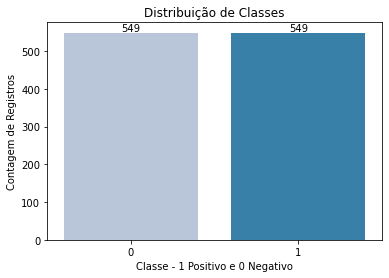

In [23]:
# Classes foram balanceadas conforme o gráfico abaixo.

graf_class2 = sns.countplot(y_res, palette = 'PuBu')
graf_class2.bar_label(graf_class2.containers[0])
graf_class2.set_xlabel('Classe - 1 Positivo e 0 Negativo')
graf_class2.set_ylabel('Contagem de Registros')
graf_class2.set_title('Distribuição de Classes')

In [24]:
# Ajustando X e Y
x_treino = x_res
y_treino = y_res
x_treino.head()

,Pclass,Sex,Age,SibSp
0,3.0,1,22.0,1
1,1.0,0,38.0,1
2,3.0,0,26.0,0
3,1.0,0,35.0,1
4,3.0,1,35.0,0


In [25]:
# Ajuste Dataset de teste
x_teste = df_teste
x_teste.head()

,Pclass,Sex,Age,SibSp
0,3,1,34.5,0
1,3,0,47.0,1
2,2,1,62.0,0
3,3,1,27.0,0
4,3,0,22.0,1


## Etapa 3 - Modelo Preditivo

### Modelo de Regressão Logística

In [26]:
# Modelo de Regressão Logística

# Cria o modelo
modelo_logistic = LogisticRegression()

In [27]:
# Fit do modelo
modelo_logistic.fit(x_treino,y_treino)

LogisticRegression()

In [28]:
# Previsões com o modelo
previsoes_1 = modelo_logistic.predict(x_teste)

Text(0.5, 1.0, 'Distribuição de Classes')

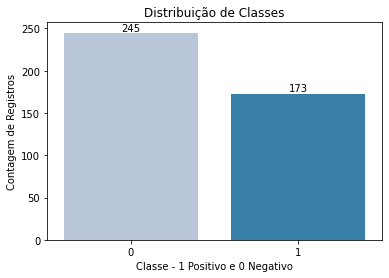

In [31]:
# Visualizando resultados do modelo
# O Kaggle retornou uma acurácia de 75%!!

graf_class2 = sns.countplot(previsoes_1, palette = 'PuBu')
graf_class2.bar_label(graf_class2.containers[0])
graf_class2.set_xlabel('Classe - 1 Positivo e 0 Negativo')
graf_class2.set_ylabel('Contagem de Registros')
graf_class2.set_title('Distribuição de Classes')

In [34]:
# Resposta para publicar no Kaggle
df_teste2 = pd.read_csv('python_scripts/titanic/test.csv')
submission = pd.DataFrame({"PassengerId": df_teste2["PassengerId"],
                            "Survived": previsoes_1})
submission.to_csv('submission.csv', index=False)